In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

/Users/sergey/Projects/ml_unn/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
def load_image(path):
    """
    Загрузка изображения
    """
    # loading and resizing
    image = tf.io.read_file(path)
    image = tf.image.decode_image(image, channels=3, expand_animations=False)
    image = tf.image.resize(image, (32, 32))
    # grayscaling
    image = tf.image.rgb_to_grayscale(image)
    # normalize
    image = tf.cast(image, tf.float32) / 255.0
    # reshape
    image = tf.reshape(image, shape=(1,32,32,1))
    return image

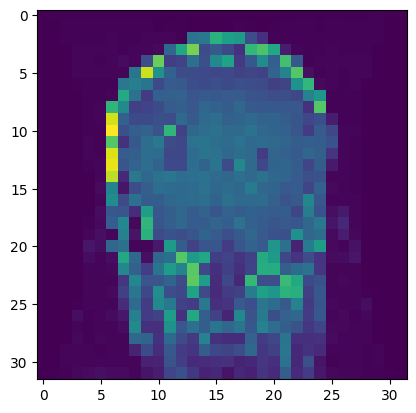

In [3]:
uploaded_file = 'datasets/brain_tumor_1/Training/glioma/Tr-gl_0010.jpg'
img = load_image(uploaded_file)

plt.imshow(img[0])
plt.show()

In [4]:
# метки классов
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

In [5]:
# загрузка модели
model = tf.keras.models.load_model('/Users/sergey/Projects/ml_unn/brain_tumor_1_model.keras')

In [6]:
# инференс модели
prediction = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [7]:
# распознанный класс
class_names[np.argmax(prediction)]

'glioma'